In [ ]:
import tensorflow as tf
import numpy as np
from skimage import data, io,filters

#set train data path
train_list_path='data/images_path/train.txt'
train_data_path='data/images/train/%s'

#load train data path
with open(train_list_path) as f:
    train_data_list = f.readlines()    
#load train data&label with path


for i,tdl in enumerate(train_data_list):
    if i==0:
        train_data=io.imread(train_data_path%tdl.split()[0]).reshape([-1,256*256*3])
        train_label=np.array([int(tdl.split()[1])])
    else:
        tmp=io.imread(train_data_path%tdl.split()[0]).reshape([-1,256*256*3])
        train_data=tf.concat([train_data,tmp],0)
        
        tmp=np.array([int(tdl.split()[1])])
        train_label=tf.concat([train_label,tmp],0)

nb_classes = 13
numb_of_neurons=98304
learning_rate=0.001
#convert train_label into one hot encoding
train_label=tf.one_hot(train_label,nb_classes,axis=1)

In [ ]:
import tensorflow as tf
import numpy as np
from skimage import data, io, filters
from mlxtend.preprocessing import one_hot
# set train data path
train_list_path = 'data/images_path/train.txt'
train_data_path = 'data/images/train/%s'


class DataRead:
    def __init__(self, data_list_path, data_path, batch_size, nb_classes):
        self.data_list_path = data_list_path
        self.data_path = data_path
        self.batch_num = 0
        self.batch_size = batch_size
        self.nb_classes = nb_classes

        with open(self.data_list_path) as f:
            self.data_list = f.readlines()
        self.total_batch = int(np.floor(np.size(self.data_list) / self.batch_size))
        
        self.label_list=[int(d.split()[1]) for d in self.data_list]
        self.data_list=[train_data_path%d.split()[0] for d in self.data_list]
        
    def Next_Batch(self):
        batch_num = self.batch_num
        batch_size = self.batch_size
        
        data_coll=io.ImageCollection(
            self.data_list[batch_num * batch_size:(batch_num + 1) * batch_size])
        data=np.array([d for d in data_coll])
        
        label_coll=self.label_list[batch_num * batch_size:(batch_num + 1) * batch_size]
        label = one_hot(label_coll, self.nb_classes)
        
        self.batch_num = self.batch_num + 1
        if self.batch_num > self.total_batch:
            self.batch_num = 0
        return (data/255.0, label)
    def All_Data(self):
        data_coll=io.ImageCollection(
            self.data_list)
        data=np.array([d for d in data_coll])
        
        label_coll=self.label_list
        label = one_hot(label_coll, self.nb_classes)
        
        return (data/255.0, label)
        

In [ ]:
with open(train_list_path) as f:
            data_list = f.readlines()

In [ ]:

for i, tdl in enumerate(data_list):
            if batch_num * batch_size <= i < (batch_num + 1) * batch_size:
                if first:
                    data = io.imread(train_data_path % tdl.split()[0])
                    first = 0
                else:
                    tmp = io.imread(train_data_path % tdl.split()[0])
                    data = tf.concat([data, tmp], 0)

In [ ]:
a=DataRead(train_list_path, train_data_path, batch_size=100, nb_classes=13)

In [ ]:
c,d=a.Next_Batch()

In [ ]:
np.arange(np.size(data_list))

In [ ]:
c.shape

In [ ]:
a.batch_num

In [ ]:
train_data_path='data/images/train/%s'

In [ ]:
c=b[1:10,0]
f='data/images/train/'

In [ ]:
a=[train_data_path%d.split()[0] for d in data_list]
b=[int(d.split()[1]) for d in data_list]

In [ ]:
bb=b[695:711]

In [ ]:
coll = io.ImageCollection(c)

In [ ]:
from mlxtend.preprocessing import one_hot

In [ ]:
f=coll[:].ipynb_c

In [ ]:
g=f.concatenate

In [ ]:
h=np.array([i for i in f])

In [ ]:
h.shape

In [ ]:
b=[1,2,3,4,5]

In [ ]:
b[0:666]

In [ ]:
a=one_hot(bb,13)

In [ ]:
a.shape

In [ ]:
import tensorflow as tf
import numpy as np
from skimage import data, io, filters
from mlxtend.preprocessing import one_hot
import random

# set train data path
train_list_path = 'data/images_path/train.txt'
train_data_path = 'data/images/train/%s'


class DataRead:
    def __init__(self, data_list_path, data_path, batch_size, nb_classes):
        self.data_list_path = data_list_path
        self.data_path = data_path
        self.batch_num = 0
        self.batch_size = batch_size
        self.nb_classes = nb_classes

        with open(self.data_list_path) as f:
            self.data_list = f.readlines()
        self.total_batch = int(np.floor(np.size(self.data_list) / self.batch_size))

        self.label_list = [int(d.split()[1]) for d in self.data_list]
        self.data_list = [train_data_path % d.split()[0] for d in self.data_list]

        # shuffle data
        ind_shuff = np.arange(np.size(self.data_list))
        random.shuffle(ind_shuff)
        self.data_list = [self.data_list[i] for i in ind_shuff]
        self.label_list = [self.label_list[i] for i in ind_shuff]

        ind_tmp = int(np.size(self.data_list) / 10/)
        self.label_list = self.label_list[ind_tmp:]
        self.data_list = self.data_list[ind_tmp:]

        self.test_label_list = self.label_list[:ind_tmp]
        self.test_data_list = self.data_list[:ind_tmp]

    def Next_Batch(self):
        batch_num = int(self.batch_num)
        batch_size = int(self.batch_size)

        data_coll = io.ImageCollection(
            self.data_list[batch_num * batch_size:(batch_num + 1) * batch_size])
        data = np.array([d for d in data_coll])

        label_coll = self.label_list[batch_num * batch_size:(batch_num + 1) * batch_size]
        label = one_hot(label_coll, self.nb_classes)

        self.batch_num = self.batch_num + 1
        if self.batch_num > self.total_batch:
            self.batch_num = 0
        return (data / 255.0, label)

    def All_Data(self):
        data_coll = io.ImageCollection(
            self.data_list)
        data = np.array([d for d in data_coll])

        label_coll = self.label_list
        label = one_hot(label_coll, self.nb_classes)

        return (data / 255.0, label)

    def Test_Data(self):
        data_coll = io.ImageCollection(
            self.test_data_list)
        data = np.array([d for d in data_coll])

        label_coll = self.test_label_list
        label = one_hot(label_coll, self.nb_classes)

        return (data / 255.0, label)


nb_classes = 13
learning_rate = 0.001
training_epochs = 45
batch_size = 256
train = DataRead(train_list_path, train_data_path, batch_size=batch_size, nb_classes=13)
test_x,text_y=train.Test_Data()

keep_prob = tf.placeholder(tf.float32)

X = tf.placeholder(tf.float32, [None, 256, 256, 3])
X_img = X
Y = tf.placeholder(tf.float32, [None, nb_classes])

W1 = tf.Variable(tf.random_normal([11, 11, 3, 96], stddev=0.001))
W2 = tf.Variable(tf.random_normal([5, 5, 96, 256], stddev=0.001))
W3 = tf.Variable(tf.random_normal([3, 3, 256, 384], stddev=0.001))
W4 = tf.Variable(tf.random_normal([3, 3, 384, 384], stddev=0.001))
W5 = tf.Variable(tf.random_normal([3, 3, 384, 256], stddev=0.001))
W6 = tf.get_variable("W6", shape=[8 * 8 * 256, 4096], initializer=tf.contrib.layers.xavier_initializer())
b6 = tf.Variable(tf.random_normal([4096]))
W7 = tf.get_variable("W7", shape=[4096, 1000], initializer=tf.contrib.layers.xavier_initializer())
b7 = tf.Variable(tf.random_normal([1000]))
W8 = tf.get_variable("W8", shape=[1000, 100], initializer=tf.contrib.layers.xavier_initializer())
b8 = tf.Variable(tf.random_normal([100]))
W9 = tf.get_variable("W9", shape=[100, nb_classes], initializer=tf.contrib.layers.xavier_initializer())
b9 = tf.Variable(tf.random_normal([nb_classes]))

with tf.name_scope("layer1") as scope:
    L1 = tf.nn.conv2d(X_img, W1, strides=[1, 4, 4, 1], padding='SAME')
    L1 = tf.nn.relu(L1)
    L1 = tf.nn.max_pool(L1, ksize=[1, 3, 3, 1], strides=[1, 2, 2, 1], padding='SAME')
    L1 = tf.nn.dropout(L1, keep_prob=keep_prob)

with tf.name_scope("layer2") as scope:
    L2 = tf.nn.conv2d(L1, W2, strides=[1, 1, 1, 1], padding='SAME')
    L2 = tf.nn.relu(L2)
    L2 = tf.nn.max_pool(L2, ksize=[1, 3, 3, 1], strides=[1, 2, 2, 1], padding='SAME')
    L2 = tf.nn.dropout(L2, keep_prob=keep_prob)

with tf.name_scope("layer3") as scope:
    L3 = tf.nn.conv2d(L2, W3, strides=[1, 1, 1, 1], padding='SAME')
    L3 = tf.nn.relu(L3)
    L3 = tf.nn.dropout(L3, keep_prob=keep_prob)

with tf.name_scope("layer4") as scope:
    L4 = tf.nn.conv2d(L3, W4, strides=[1, 1, 1, 1], padding='SAME')
    L4 = tf.nn.relu(L4)
    L4 = tf.nn.dropout(L4, keep_prob=keep_prob)

with tf.name_scope("layer5") as scope:
    L5 = tf.nn.conv2d(L4, W5, strides=[1, 1, 1, 1], padding='SAME')
    L5 = tf.nn.relu(L5)
    L5 = tf.nn.max_pool(L5, ksize=[1, 3, 3, 1], strides=[1, 2, 2, 1], padding='SAME')
    L5 = tf.reshape(L5, [-1, 8 * 8 * 256])
    L5 = tf.nn.dropout(L5, keep_prob=keep_prob)

with tf.name_scope("layer6") as scope:
    L6 = tf.nn.relu(tf.matmul(L5, W6) + b6)
    L6 = tf.nn.dropout(L6, keep_prob=keep_prob)

with tf.name_scope("layer7") as scope:
    L7 = tf.nn.relu(tf.matmul(L6, W7) + b7)
    L7 = tf.nn.dropout(L7, keep_prob=keep_prob)

with tf.name_scope("layer8") as scope:
    L8 = tf.nn.relu(tf.matmul(L7, W8) + b8)
    L8 = tf.nn.dropout(L8, keep_prob=keep_prob)

with tf.name_scope("layer9") as scope:
    logits = tf.matmul(L8, W9) + b9

with tf.name_scope("cost") as scope:
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=Y))
    cost_summ = tf.summary.scalar("cost", cost)

with tf.name_scope("train") as scope:
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

with tf.name_scope("prediction") as scope:
    correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(Y, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    accuracy_summ = tf.summary.scalar("accuracy", accuracy)

# train my model
with tf.Session() as sess:
    print('Learning started. It takes sometime.')
    merged_summary = tf.summary.merge_all()
    sess.run(tf.global_variables_initializer())
    writer = tf.summary.FileWriter('./logs/KIST/learning_rate_0_001')
    writer.add_graph(sess.graph)
    step = 0
    for epoch in range(training_epochs):
        avg_cost = 0
        avg_a = 0
        total_batch = train.total_batch

        for i in range(total_batch):
            batch_xs, batch_ys = train.Next_Batch()
            feed_dict = {X: batch_xs, Y: batch_ys, keep_prob: 0.7}
            c, _,s = sess.run([cost, optimizer,merged_summary], feed_dict=feed_dict)
            a=sess.run(accuracy, feed_dict={X:test_x, Y:text_y, keep_prob: 1})
            avg_cost += c / total_batch
            avg_a += a / total_batch

            writer.add_summary(s, global_step=step)
            step += 1

        print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost), 'accuracy =', '{:.9f}'.format(avg_a))

    val_list_path = 'data/images_path/val.txt'
    val_data_path = 'data/images/val/%s'
    val = DataRead(val_list_path, val_data_path, batch_size=100, nb_classes=13)

    val_x, val_y = val.Next_Batch()
    print('Accuracy:', sess.run(accuracy, feed_dict={X: val_x, Y: val_y, keep_prob: 1}))


In [1]:
import tensorflow as tf
import numpy as np
from skimage import data, io, filters
from mlxtend.preprocessing import one_hot
import random

# set train data path
train_list_path = 'data/images_path/train.txt'
train_data_path = 'data/images/train/%s'


class DataRead:
    def __init__(self, data_list_path, data_path, batch_size, nb_classes):
        self.data_list_path = data_list_path
        self.data_path = data_path
        self.batch_num = 0
        self.batch_size = batch_size
        self.nb_classes = nb_classes

        with open(self.data_list_path) as f:
            self.data_list = f.readlines()
        self.total_batch = int(np.floor(np.size(self.data_list) / self.batch_size))

        self.label_list = [int(d.split()[1]) for d in self.data_list]
        self.data_list = [train_data_path % d.split()[0] for d in self.data_list]

        # shuffle data
        ind_shuff = np.arange(np.size(self.data_list))
        random.shuffle(ind_shuff)
        self.data_list = [self.data_list[i] for i in ind_shuff]
        self.label_list = [self.label_list[i] for i in ind_shuff]

    def Next_Batch(self):
        batch_num = int(self.batch_num)
        batch_size = int(self.batch_size)

        data_coll = io.ImageCollection(
            self.data_list[batch_num * batch_size:(batch_num + 1) * batch_size])
        data = np.array([d for d in data_coll])

        label_coll = self.label_list[batch_num * batch_size:(batch_num + 1) * batch_size]
        label = one_hot(label_coll, self.nb_classes)

        self.batch_num = self.batch_num + 1
        if self.batch_num > self.total_batch:
            self.batch_num = 0
        return (data / 255.0, label)

    def Next_batch_not_one_hot(self):
        batch_num = int(self.batch_num)
        batch_size = int(self.batch_size)

        data_coll = io.ImageCollection(
            self.data_list[batch_num * batch_size:(batch_num + 1) * batch_size])
        data = np.array([d for d in data_coll])

        label_coll = self.label_list[batch_num * batch_size:(batch_num + 1) * batch_size]
        label = label_coll

        self.batch_num = self.batch_num + 1
        if self.batch_num > self.total_batch:
            self.batch_num = 0
        return (data / 255.0, label)

    def All_Data(self):
        data_coll = io.ImageCollection(
            self.data_list)
        data = np.array([d for d in data_coll])

        label_coll = self.label_list
        label = one_hot(label_coll, self.nb_classes)

        return (data / 255.0, label)

    def All_Data_not_one_hot(self):
        data_coll = io.ImageCollection(
            self.data_list)
        data = np.array([d for d in data_coll])

        label_coll = self.label_list
        label = label_coll

        return (data / 255.0, label)

nb_classes = 13
learning_rate = 0.001
training_epochs = 45
batch_size = 256
train = DataRead(train_list_path, train_data_path, batch_size=batch_size, nb_classes=13)

keep_prob = tf.placeholder(tf.float32)

X = tf.placeholder(tf.float32, [None, 256, 256, 3])
X_img = X
Y = tf.placeholder(tf.float32, [None, nb_classes])

W1 = tf.Variable(tf.random_normal([11, 11, 3, 96], stddev=0.001))
W2 = tf.Variable(tf.random_normal([5, 5, 96, 256], stddev=0.001))
W3 = tf.Variable(tf.random_normal([3, 3, 256, 384], stddev=0.001))
W4 = tf.Variable(tf.random_normal([3, 3, 384, 384], stddev=0.001))
W5 = tf.Variable(tf.random_normal([3, 3, 384, 256], stddev=0.001))
W6 = tf.get_variable("W6", shape=[8 * 8 * 256, 4096], initializer=tf.contrib.layers.xavier_initializer())
b6 = tf.Variable(tf.random_normal([4096]))
W7 = tf.get_variable("W7", shape=[4096, 1000], initializer=tf.contrib.layers.xavier_initializer())
b7 = tf.Variable(tf.random_normal([1000]))
W8 = tf.get_variable("W8", shape=[1000, 100], initializer=tf.contrib.layers.xavier_initializer())
b8 = tf.Variable(tf.random_normal([100]))
W9 = tf.get_variable("W9", shape=[100, nb_classes], initializer=tf.contrib.layers.xavier_initializer())
b9 = tf.Variable(tf.random_normal([nb_classes]))

with tf.name_scope("layer1") as scope:
    L1 = tf.nn.conv2d(X_img, W1, strides=[1, 4, 4, 1], padding='SAME')
    L1 = tf.nn.relu(L1)
    L1 = tf.nn.max_pool(L1, ksize=[1, 3, 3, 1], strides=[1, 2, 2, 1], padding='SAME')
    L1 = tf.nn.dropout(L1, keep_prob=keep_prob)

with tf.name_scope("layer2") as scope:
    L2 = tf.nn.conv2d(L1, W2, strides=[1, 1, 1, 1], padding='SAME')
    L2 = tf.nn.relu(L2)
    L2 = tf.nn.max_pool(L2, ksize=[1, 3, 3, 1], strides=[1, 2, 2, 1], padding='SAME')
    L2 = tf.nn.dropout(L2, keep_prob=keep_prob)

with tf.name_scope("layer3") as scope:
    L3 = tf.nn.conv2d(L2, W3, strides=[1, 1, 1, 1], padding='SAME')
    L3 = tf.nn.relu(L3)
    L3 = tf.nn.dropout(L3, keep_prob=keep_prob)

with tf.name_scope("layer4") as scope:
    L4 = tf.nn.conv2d(L3, W4, strides=[1, 1, 1, 1], padding='SAME')
    L4 = tf.nn.relu(L4)
    L4 = tf.nn.dropout(L4, keep_prob=keep_prob)

with tf.name_scope("layer5") as scope:
    L5 = tf.nn.conv2d(L4, W5, strides=[1, 1, 1, 1], padding='SAME')
    L5 = tf.nn.relu(L5)
    L5 = tf.nn.max_pool(L5, ksize=[1, 3, 3, 1], strides=[1, 2, 2, 1], padding='SAME')
    L5 = tf.reshape(L5, [-1, 8 * 8 * 256])
    L5 = tf.nn.dropout(L5, keep_prob=keep_prob)

with tf.name_scope("layer6") as scope:
    L6 = tf.nn.relu(tf.matmul(L5, W6) + b6)
    L6 = tf.nn.dropout(L6, keep_prob=keep_prob)

with tf.name_scope("layer7") as scope:
    L7 = tf.nn.relu(tf.matmul(L6, W7) + b7)
    L7 = tf.nn.dropout(L7, keep_prob=keep_prob)

with tf.name_scope("layer8") as scope:
    L8 = tf.nn.relu(tf.matmul(L7, W8) + b8)
    L8 = tf.nn.dropout(L8, keep_prob=keep_prob)

with tf.name_scope("layer9") as scope:
    logits = tf.matmul(L8, W9) + b9

with tf.name_scope("cost") as scope:
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=Y))
    cost_summ = tf.summary.scalar("cost", cost)

with tf.name_scope("train") as scope:
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

with tf.name_scope("prediction") as scope:
    correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(Y, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    accuracy_summ = tf.summary.scalar("accuracy", accuracy)

# train my model
sess=tf.Session()
print('Learning started. It takes sometime.')
merged_summary = tf.summary.merge_all()
sess.run(tf.global_variables_initializer())
writer = tf.summary.FileWriter('./logs/KIST/learning_rate_0_001')
writer.add_graph(sess.graph)
step = 0
for epoch in range(training_epochs):
    avg_cost = 0
    avg_a = 0
    total_batch = train.total_batch

    for i in range(total_batch):
        batch_xs, batch_ys = train.Next_Batch()
        feed_dict = {X: batch_xs, Y: batch_ys, keep_prob: 0.7}
        c, _, a,s = sess.run([cost, optimizer, accuracy,merged_summary], feed_dict=feed_dict)
        avg_cost += c / total_batch
        avg_a += a / total_batch

        writer.add_summary(s, global_step=step)
        step += 1

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost), 'accuracy =', '{:.9f}'.format(avg_a))

score_rcv=[]
score_sv=[]
score_dt=[]
score_cnn=[]

val_list_path = 'data/images_path/val.txt'
val_data_path = 'data/images/val/%s'
val = DataRead(val_list_path, val_data_path, batch_size=128, nb_classes=13)
total_batch_test=val.total_batch

#Decision Tree
from sklearn import tree
clf_dt=tree.DecisionTreeClassifier(criterion='entropy',max_depth=None)

#RidgeClassifier
from sklearn.linear_model import LinearRegression, RidgeClassifierCV
rcv=RidgeClassifierCV()


from sklearn import datasets, svm, metrics
clf_sv=svm.SVC(kernel='linear',C=1)

#test data set for others (except CNN)
text_x,text_y=val.All_Data_not_one_hot()
text_x=np.array([d.reshape([3*256*256]) for d in text_x])

for i in range(total_batch_test):
    val_x, val_y = val.Next_Batch()
    #AlexNet
    a=sess.run(accuracy, feed_dict={X: val_x, Y: val_y, keep_prob: 1})
    score_cnn=np.append(score_cnn,a)
    
    x,y=train.Next_batch_not_one_hot()
    x=np.array([d.reshape([3*256*256]) for d in x])
    
    #Decision Tree
    clf_dt.fit(x,y)
    score_dt=np.append(score_dt,clf_dt.score(text_x,text_y))
    
    #RidgeClassifier
    rcv.fit(x,y)
    score_rcv=np.append(score_rcv,rcv.score(text_x,text_y))
    
    #support_vector machine
    clf_sv.fit(x,y)
    score_sv=np.append(score_sv,clf_sv.score(text_x,text_y))

print('Accuracy of Decision Tree : ',score_dt.mean())
print('Accuracy of LinearRCV : ',score_rcv.mean())
print('Accuracy of SVM : ',score_sv.mean())
print('Accuracy of CNN : ',score_cnn.mean())

value=(score_rcv.mean(),score_sv.mean(),score_dt.mean(),score_cnn.mean())
std=(score_rcv.std(),score_sv.std(),score_dt.std(),score_cnn.std())
classifiers = ('LinearRCV', 'SVM', 'DT', 'AlexNet')
y_pos = np.arange(len(classifiers))

plt.bar(y_pos, value, yerr=std, align='center', alpha=0.5)
plt.xticks(y_pos, classifiers)
plt.ylabel('Score')
plt.title('Performance of The Different Classifiers')
plt.show()


Learning started. It takes sometime.
Epoch: 0001 cost = 2.866823452 accuracy = 0.208043981
Epoch: 0002 cost = 1.823801659 accuracy = 0.423141439
Epoch: 0003 cost = 1.502379576 accuracy = 0.477078301
Epoch: 0004 cost = 1.464128318 accuracy = 0.481707931
Epoch: 0005 cost = 1.335007120 accuracy = 0.505290106
Epoch: 0006 cost = 1.350503370 accuracy = 0.503637866
Epoch: 0007 cost = 1.324790760 accuracy = 0.503759477
Epoch: 0008 cost = 1.238530879 accuracy = 0.520583819
Epoch: 0009 cost = 1.120865062 accuracy = 0.573843431
Epoch: 0010 cost = 1.013975106 accuracy = 0.606582125
Epoch: 0011 cost = 0.860219377 accuracy = 0.666991662
Epoch: 0012 cost = 0.799016599 accuracy = 0.689397560
Epoch: 0013 cost = 0.709085873 accuracy = 0.733370657
Epoch: 0014 cost = 0.645612955 accuracy = 0.766295961
Epoch: 0015 cost = 0.608599535 accuracy = 0.782560472
Epoch: 0016 cost = 0.552817200 accuracy = 0.802049787
Epoch: 0017 cost = 0.520392292 accuracy = 0.821581037
Epoch: 0018 cost = 0.537029433 accuracy = 0.8

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

KeyboardInterrupt: 

In [49]:
x,y=train.Next_Batch()
x=np.array([d.reshape([3*256*256]) for d in x])

clf_dt=tree.DecisionTreeClassifier(criterion='entropy',max_depth=None)
clf_dt.fit(x,y)

MemoryError: 

In [94]:
score_rcv=[]
score_sv=[]
score_dt=[]
score_cnn=[]

val_list_path = 'data/images_path/val.txt'
val_data_path = 'data/images/val/%s'
val = DataRead(val_list_path, val_data_path, batch_size=128, nb_classes=13)
total_batch_test=val.total_batch

#Decision Tree
from sklearn import tree
clf_dt=tree.DecisionTreeClassifier(criterion='entropy',max_depth=None)

#RidgeClassifier
from sklearn.linear_model import LinearRegression, RidgeClassifierCV
rcv=RidgeClassifierCV()


from sklearn import datasets, svm, metrics
clf_sv=svm.SVC(kernel='linear',C=1)

#test data set for others (except CNN)
text_x,text_y=val.All_Data_not_one_hot()
text_x=np.array([d.reshape([3*256*256]) for d in text_x])

for i in range(total_batch_test):
    val_x, val_y = val.Next_Batch()
    #AlexNet
    a=sess.run(accuracy, feed_dict={X: val_x, Y: val_y, keep_prob: 1})
    score_cnn=np.append(score_cnn,a)
    
    x,y=train.Next_batch_not_one_hot()
    x=np.array([d.reshape([3*256*256]) for d in x])
    
    #Decision Tree
    clf_dt.fit(x,y)
    score_dt=np.append(score_dt,clf_dt.score(text_x,text_y))
    
    #RidgeClassifier
    rcv.fit(x,y)
    score_rcv=np.append(score_rcv,rcv.score(text_x,text_y))
    
    #support_vector machine
    clf_sv.fit(x,y)
    score_sv=np.append(score_sv,clf_sv.score(text_x,text_y))

print('Accuracy of Decision Tree : ',score_dt.mean())
print('Accuracy of LinearRCV : ',score_rcv.mean())
print('Accuracy of SVM : ',score_sv.mean())
print('Accuracy of CNN : ',score_cnn.mean())

value=(score_rcv.mean(),score_sv.mean(),score_dt.mean(),score_cnn.mean())
std=(score_rcv.std(),score_sv.std(),score_dt.std(),score_cnn.std())
classifiers = ('LinearRCV', 'SVM', 'DT', 'AlexNet')
y_pos = np.arange(len(classifiers))

plt.bar(y_pos, value, yerr=std, align='center', alpha=0.5)
plt.xticks(y_pos, classifiers)
plt.ylabel('Score')
plt.title('Performance of The Different Classifiers')
plt.show()


KeyboardInterrupt: 

In [85]:

# for i in range(total_batch_test):
#     print(i)

print(score_dt)


[ 0.5581638   0.55242567]


In [84]:

# for i in range(total_batch_test):
#     print(i)
x,y=train.Next_batch_not_one_hot()
x=np.array([d.reshape([3*256*256]) for d in x])

print(score_rcv)

[ 0.61398018  0.64840897]


In [88]:

x,y=train.Next_batch_not_one_hot()
x=np.array([d.reshape([3*256*256]) for d in x])

print(score_sv)

In [89]:
print(score_sv)

[ 0.72822118  0.6875326 ]


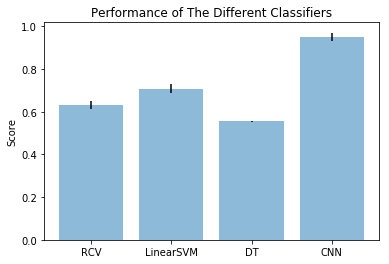

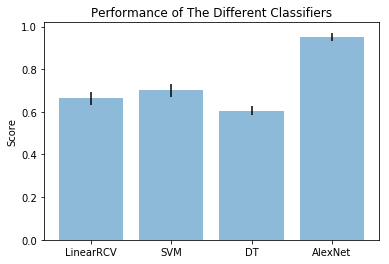

In [95]:
value=(score_rcv.mean(),score_sv.mean(),score_dt.mean(),score_cnn.mean())
std=(score_rcv.std(),score_sv.std(),score_dt.std(),score_cnn.std())
classifiers = ('LinearRCV', 'SVM', 'DT', 'AlexNet')
y_pos = np.arange(len(classifiers))

plt.bar(y_pos, value, yerr=std, align='center', alpha=0.5)
plt.xticks(y_pos, classifiers)
plt.ylabel('Score')
plt.title('Performance of The Different Classifiers')
plt.show()
